# Data Analysis and EDA on Telco data

## Importing required libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
telco_data = pd.read_csv('https://raw.githubusercontent.com/ujoshidev/Telco-Customer-Churn/main/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Checking for missing values

In [3]:
print(telco_data.shape)
print(telco_data.info())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [4]:
# telco_data.isna().sum().sum()

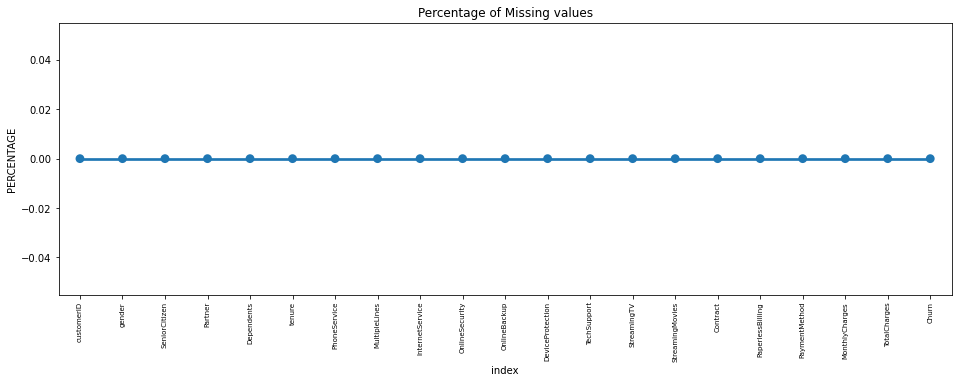

In [5]:
missing = pd.DataFrame((telco_data.isnull().sum())*100/telco_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show();

No null value present in our dataset

General Thumb Rules:

* *For features with less missing values-* can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* *For features with very high number of missing values-* it is better to drop those columns as they give very less insight on analysis. <br>
As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. <br>But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Descriptive Statistics

In [6]:
#descriptive stats of numerical variables
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Below are some insights:**
* 75% of customers have tenure less than 55 months.
* Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month.
* Here, SeniorCitizen contains binary data.. Thats why we are getting improper value in given quartiles.

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64 



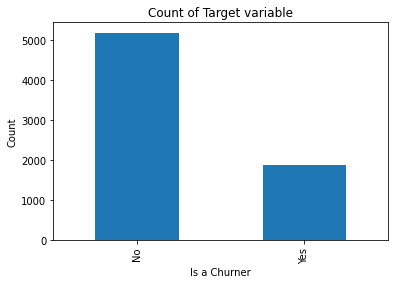

In [7]:
print(100*telco_data['Churn'].value_counts()/len(telco_data['Churn']),'\n')

telco_data.Churn.value_counts().plot(kind='bar')
plt.xlabel('Is a Churner')
plt.ylabel('Count')
plt.title('Count of Target variable');

**Insights:**
* Data is highly imbalanced, ratio = 73:27
* So, we analyse the data with other features while taking the target values separately to get some insights.

## Data Cleaning

In [8]:
telco_cdata = telco_data.copy(deep=True)

In [9]:
#TotalCharges should be a numeric data. So, we'll convert it.
telco_cdata.TotalCharges = pd.to_numeric(telco_cdata.TotalCharges, errors='coerce')
telco_cdata.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [10]:
telco_cdata.loc[telco_cdata ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [11]:
telco_cdata.dropna(how = 'any', inplace = True)

telco_data.isna().sum().sum()

0

Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on

In [12]:
print(telco_cdata['tenure'].max())

labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
telco_cdata['tenure_group'] = pd.cut(telco_cdata.tenure, range(1, 80, 12), right=False, labels=labels)

72


In [13]:
telco_cdata['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

Removing columns not required for processing

In [14]:
telco_cdata.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_cdata.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## EDA

1. Univariate Analysis

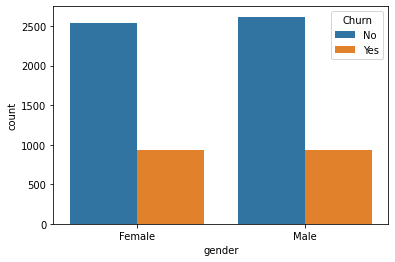

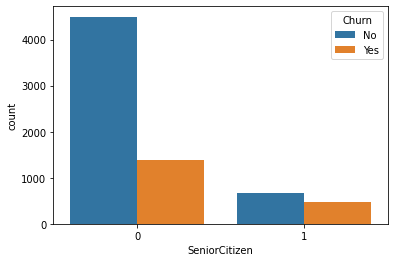

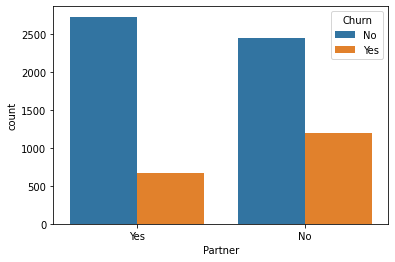

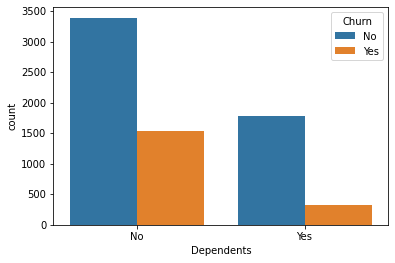

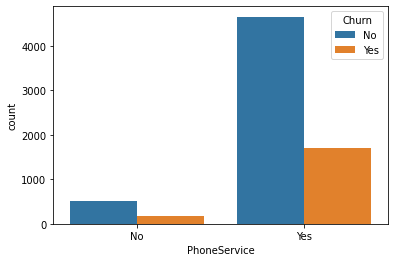

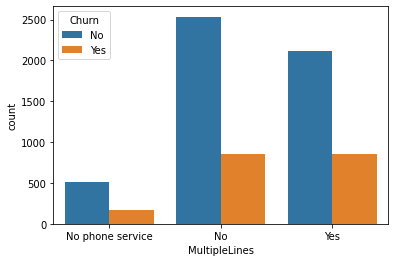

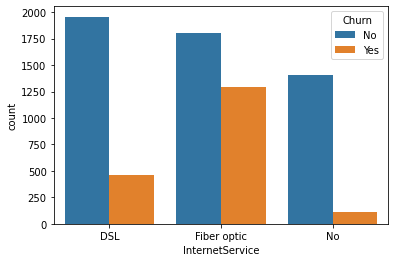

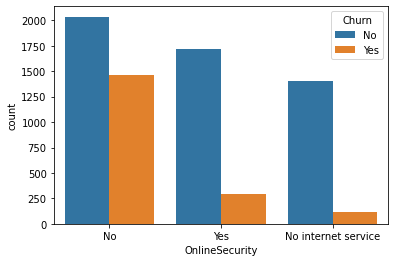

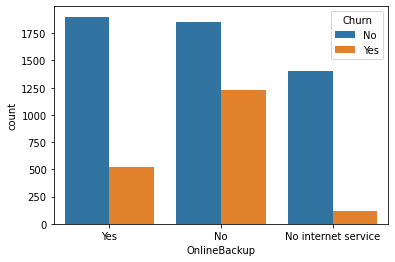

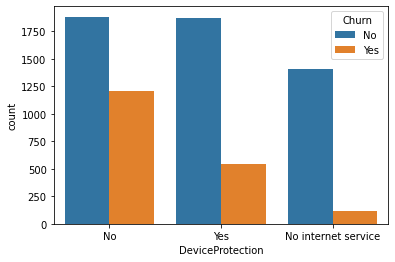

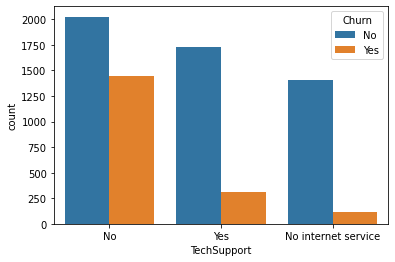

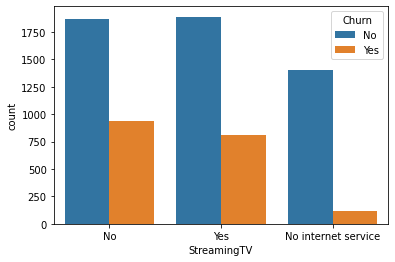

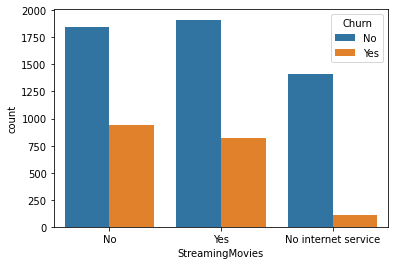

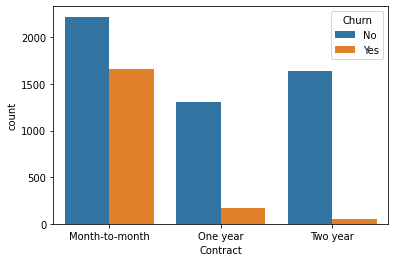

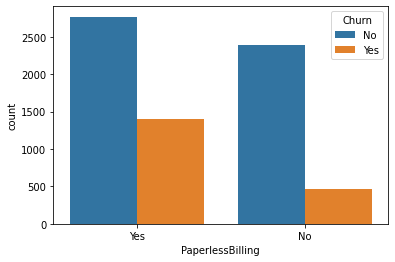

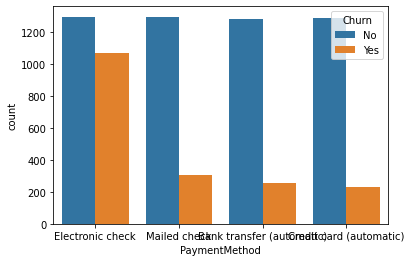

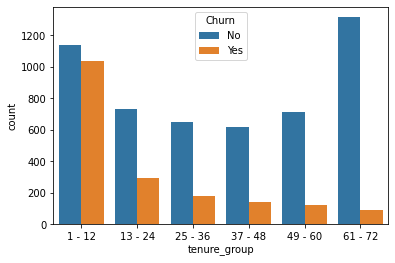

In [15]:
for i, predictor in enumerate(telco_cdata.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_cdata, x=predictor, hue='Churn')

**Below are the Insights from Univariate analysis**<br>
*For Gender:* Right now we don't see useful insight. We have to dig down to find patterns.

*For SeniorCitizen:* On initial analysis, We can see that SeniorCitizen has high rate of churning. But the overall count is small for SeniorCitizen comparing to Non-SeniorCitizen customers.

*For Partner:* Singles have high churn rate.

*For Dependents:* Those customers who does not have any dependent have higher churn rate.

*For PhoneService:* High churn rate in customers who opt for PhoneService.

*For MulyipleLines: Churn rate is quite same in customers opted for single-line and multiple-line PhoneService.

*For InternetService:* Those who opted for Fiber-optic connection have highest churn rate.

*For OnlineSecurity:* Customer without any OnlineSecurity have high churn rate.

*For OnlineBackup:* Customer without any OnlineBackup have high churn rate.

*For DeviceProtection:* Customer without any DeviceProtection plan have high churn rate.

*For TechSupport:* Customer who do not take TechSupport have high churn rate.

*For StreamingTV:* Right now, we dont have useful insight on this. Maybe on futher investigation we find some patterns.

*For StreamingMovies:* Right now, we dont have useful insight on this. Maybe on futher investigation we find some patterns.

*For Contract:* Customers having m2m contract have highest churn rate.

*For PaperlessBilling:* Customers who opt for paperless billing option have high churn rate.

*For PaymentMethod:* Customers who make payments via electronic check have significant high churn rate.

*For tenure_group:* Customers having 1-12 tenure have highest churn rate. Also on thing to note here is the churning rate is decresing when tenure increasing.

Now, we'll convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [16]:
telco_cdata['Churn'] = np.where(telco_cdata.Churn == 'Yes',1,0)

Converting all the categorical variables into dummy variables

In [17]:
telco_cdata_dummies = pd.get_dummies(telco_cdata)
telco_cdata_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


Relationship between Monthly Charges and Total Charges

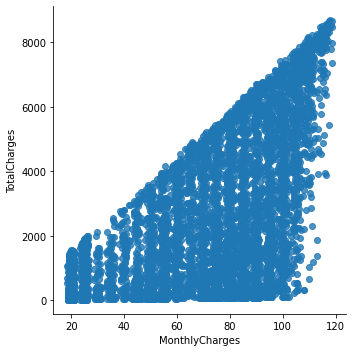

In [18]:
sns.lmplot(data=telco_cdata_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False);

**Insight**: Total Charges increase as Monthly Charges increase - as expected.

Plotting churn by Monthly Charges and Total Charges

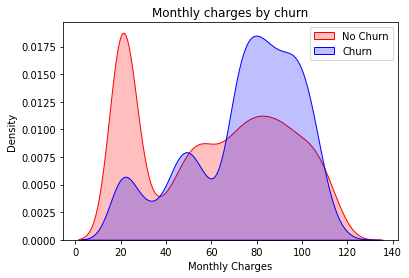

In [19]:
Mth = sns.kdeplot(telco_cdata_dummies.MonthlyCharges[(telco_cdata_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_cdata_dummies.MonthlyCharges[(telco_cdata_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn');

**Insight:**
Churn is high when Monthly Charges are high

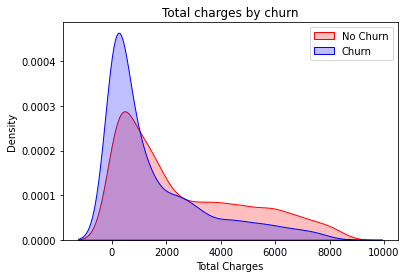

In [20]:
Tot = sns.kdeplot(telco_cdata_dummies.TotalCharges[(telco_cdata_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_cdata_dummies.TotalCharges[(telco_cdata_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn');

**Insight:** Customer having "Lower total-charges" have "high churn rate".

Above insight is quite surprising. <br> Lets dig down further.

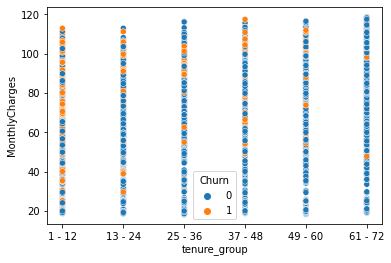

In [21]:
sns.scatterplot(data=telco_cdata, x='tenure_group', y='MonthlyCharges', hue='Churn')

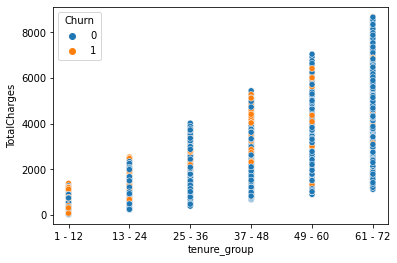

In [22]:
sns.scatterplot(data=telco_cdata, x='tenure_group', y='TotalCharges', hue='Churn')

Now the picture is bit clear:- *Higher Monthly Charge at Lower tenure results into Lower Total Charge*.

==> **Higher monthly charge, lower tenure and lower total charge are linkd to High Churn**

## Correlation graph

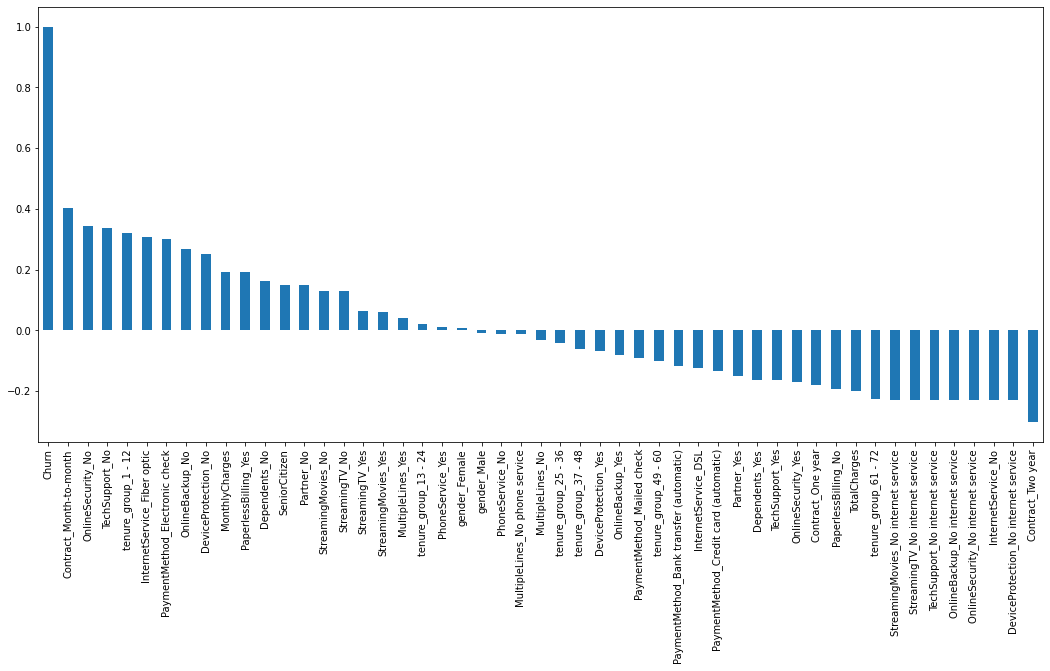

In [23]:
plt.figure(figsize=(18,8))
telco_cdata_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');

**Insights:**<br>
* HIGH Churn: seen in case of Month to Month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet.

* LOW Churn: seen in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

***Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn***

## Bivariate analysis

In [24]:
df0 = telco_cdata.loc[telco_cdata["Churn"]==0]
df1 = telco_cdata.loc[telco_cdata["Churn"]==1]

In [25]:
def plot_analysis(df, col, title, hue=None):
    
    temp = pd.Series(data=hue)
    
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

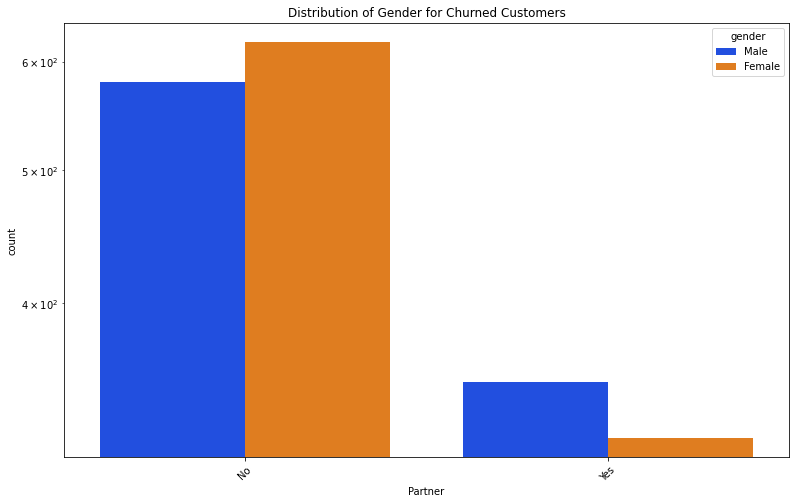

In [26]:
plot_analysis(df1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

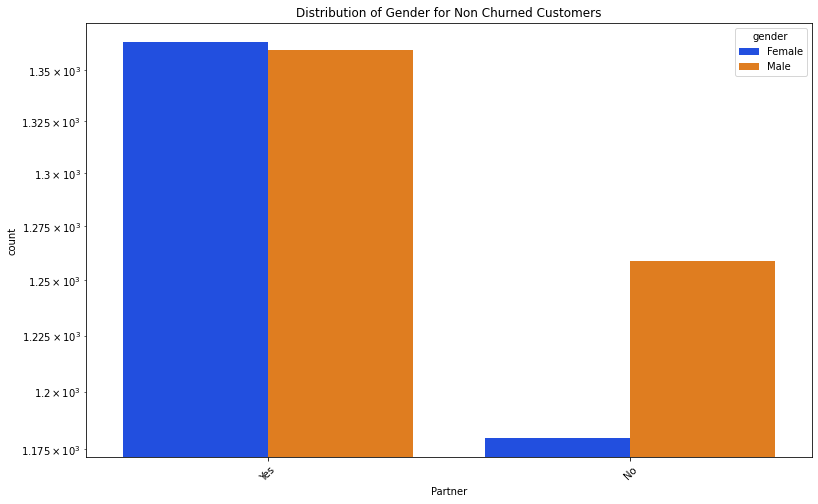

In [27]:
plot_analysis(df0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

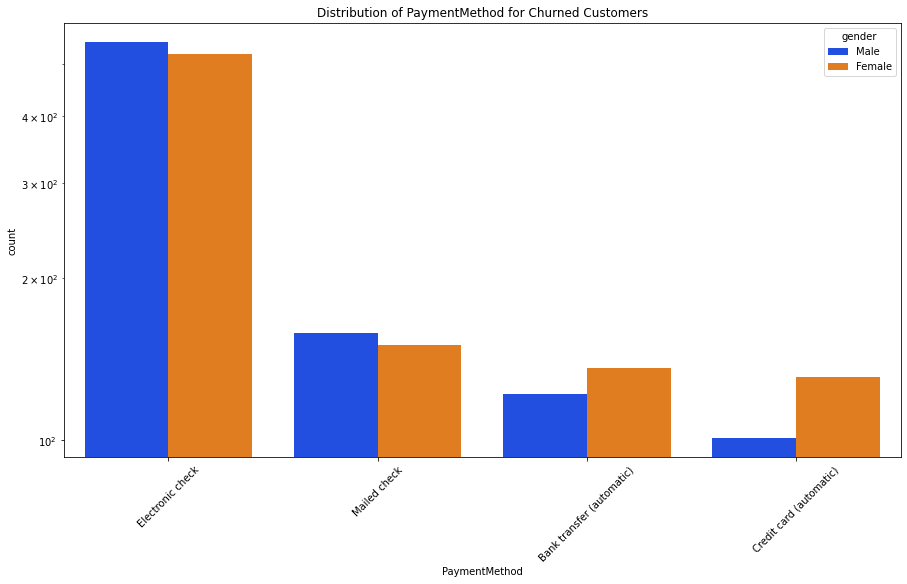

In [28]:
plot_analysis(df1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

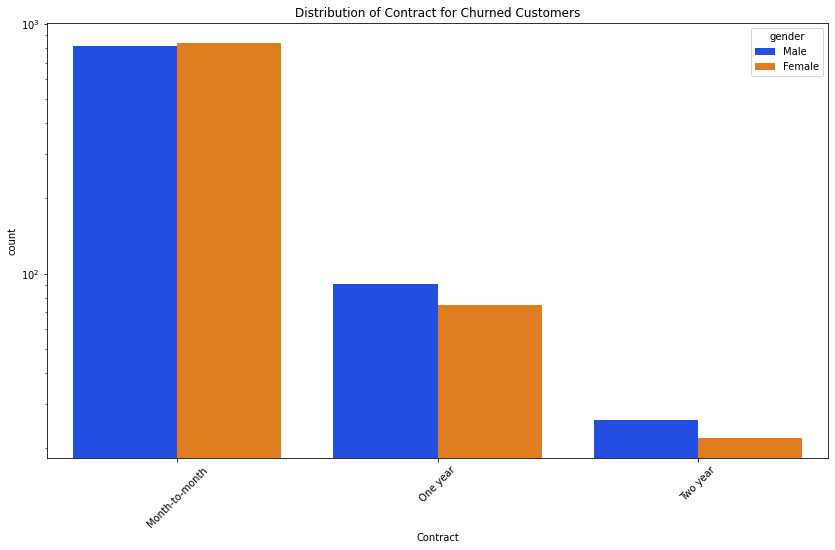

In [29]:
plot_analysis(df1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

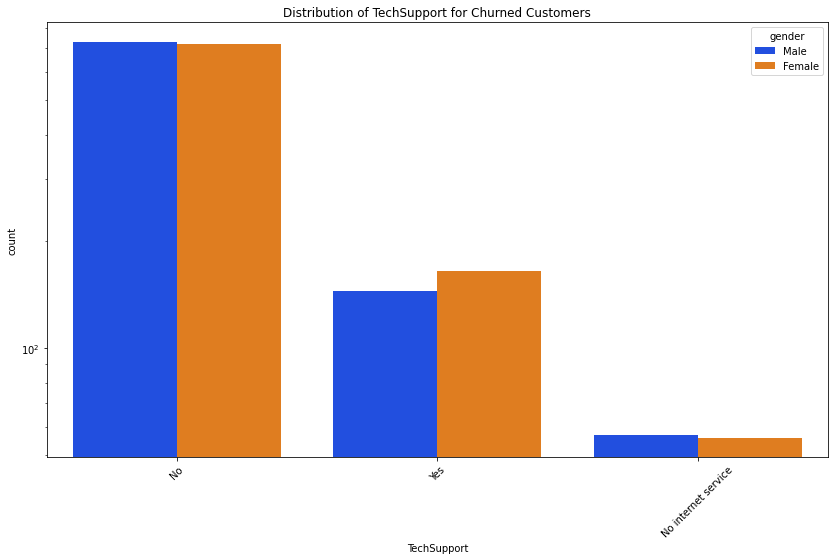

In [30]:
plot_analysis(df1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

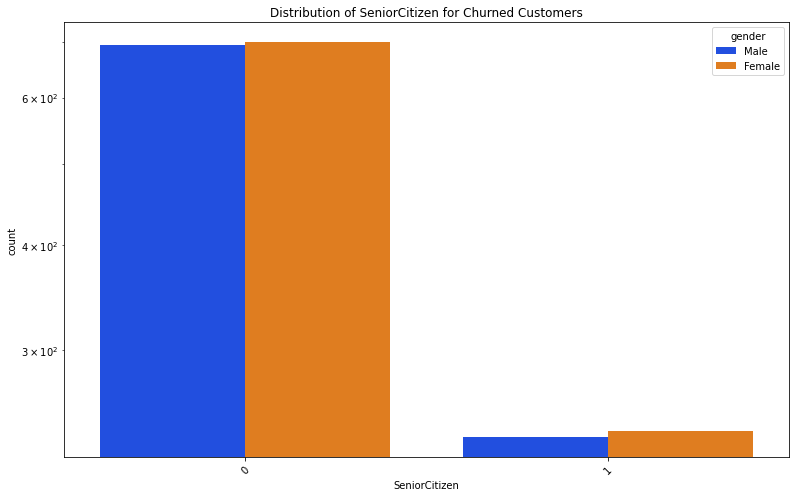

In [31]:
plot_analysis(df1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

## Conclusion

Below are some quick insights:

* Customers who use Electronic check medium are the highest churners.
* Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
* No Online security, No Tech Support category are high churners.
* Non senior Citizens are high churners.

In [32]:
telco_cdata_dummies.to_csv('telco_churn_dummies.csv')